In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
import seaborn as sns

In [84]:
sns.set_palette("colorblind")
%config InlineBackend.figure_format = "retina"

In [118]:
agents = ["LRKF", "FLoRES", "adamw", "LoFi", "muon"]

In [119]:
def plot_rewards(rewards, **kwargs):
    rewards = pd.DataFrame(rewards)
    
    median = rewards.cumsum().mean(axis=1)
    # lbound = rewards.cumsum().quantile(0.25, axis=1)
    # ubound = rewards.cumsum().quantile(0.75, axis=1)
    
    median.plot(**kwargs)
    # plt.fill_between(median.index, lbound, ubound, alpha=0.3)

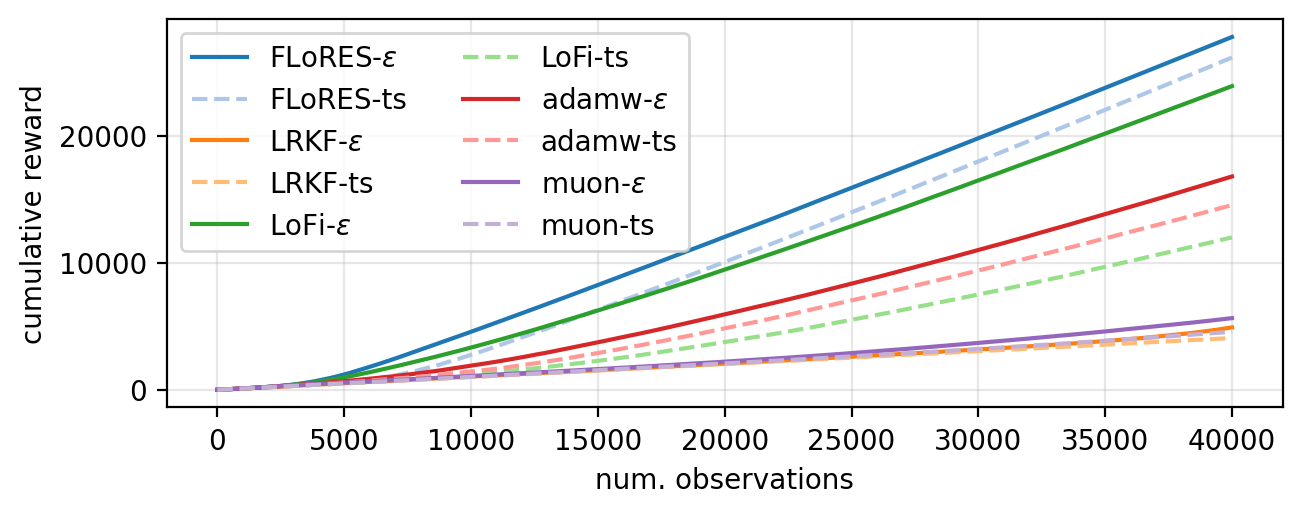

In [122]:
fig, ax = plt.subplots(figsize=(7.2, 4.2 * 0.6))

colors = sns.color_palette("tab20")
for i, agent in enumerate(sorted(agents)):
    agent_path_eps = f"./output/{agent}_eps_5.pkl"
    agent_path_ts = f"./output/{agent}_ts.pkl"

    res = pd.read_pickle(agent_path_eps)
    plot_rewards(res["rewards"].T, label=rf"{agent}-$\epsilon$", color=colors[2 * i])

    res = pd.read_pickle(agent_path_ts)
    plot_rewards(res["rewards"].T, label=f"{agent}-ts", linestyle="--", color=colors[2 * i  + 1])
    
plt.legend(ncol=2)
plt.xlabel("num. observations")
plt.ylabel("cumulative reward")
plt.grid(alpha=0.3)
plt.savefig("../figures/mnist-bandit-reward.png", dpi=300, bbox_inches="tight")